In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
data=pd.read_excel('iris.xls')

In [4]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
med=data.median()
df = data.fillna(med)

/tmp/ipykernel_8322/2366100806.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med=data.median()


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [8]:
df['Classification']=label_encoder.fit_transform(df['Classification'])

In [9]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


<Axes: >

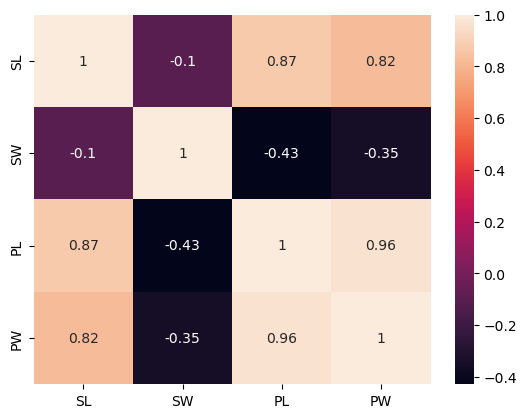

In [10]:
c=sns.heatmap(data.corr(),annot=True)
c

In [11]:
x=df.drop('Classification',axis=1)
y=df['Classification']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [13]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [14]:
model=lr.fit(X_train,y_train)

In [15]:
y_pred=model.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error
print('MSE is : \n',mean_squared_error(y_test,y_pred))

MSE is : 
 0.03674897628057208


In [17]:
from sklearn.metrics import r2_score
print('R squre value  is :\n',r2_score(y_test,y_pred))

R squre value  is :
 0.9474179989626155


In [18]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(X_train,y_train)

SVC(kernel='linear')

In [19]:
y_pred=svmclf.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy is ',accuracy_score(y_test,y_pred))


Accuracy is  1.0


In [20]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)
y_pred=dt_clf.predict(X_test)
print('Accuracy is ',accuracy_score(y_test,y_pred))

Accuracy is  1.0


In [21]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [23]:
y_pred=rf_clf.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [24]:
print('Accuracy is ',accuracy_score(y_test,y_pred))

Accuracy is  1.0


In [25]:
rf_clf1=RandomForestClassifier(n_estimators=20,max_depth=3,criterion='entropy',min_samples_split=2)
rf_clf1.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=25)

In [26]:
y_pred=rf_clf1.predict(X_test)
print('Accuracy is ',accuracy_score(y_test,y_pred))

Accuracy is  1.0


In [27]:
rf_clf1=RandomForestClassifier(n_estimators=20,max_depth=10,criterion='entropy',min_samples_split=2)
rf_clf1.fit(X_train,y_train)
y_pred=rf_clf1.predict(X_test)
print('Accuracy is ',accuracy_score(y_test,y_pred))

Accuracy is  1.0
